In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import datetime as dt

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

from sklearn.tree import plot_tree

from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/Fraud_Detection_Dataset.csv")

In [11]:
df

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud,trans_date_time
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No,2023-01-01 00:00:00
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No,2023-01-01 00:01:00
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No,2023-01-01 00:02:00
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No,2023-01-01 00:03:00
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No,2023-01-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1524,1475.988992,2023-01-07 22:35:00,Clothing,Los Angeles,95.068658,414.231539,desktop,Yes,2023-01-07 22:35:00
9996,9997,4879,764.834233,2023-01-07 22:36:00,Clothing,Los Angeles,902.506946,1090.687430,mobile,No,2023-01-07 22:36:00
9997,9998,2624,882.096776,2023-01-07 22:37:00,Travel,New York,531.237353,186.667431,mobile,No,2023-01-07 22:37:00
9998,9999,4907,1.000000,2023-01-07 22:38:00,Dining,Chicago,0.000000,116.343224,desktop,No,2023-01-07 22:38:00


In [18]:
df['Device Type'].unique()

array(['desktop', 'mobile'], dtype=object)

In [5]:
df.describe()

,Transaction ID,Customer ID,Transaction Amount,Previous Transaction Amount,Time Since Last Transaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,3010.561100,559.865608,461.410984,677.040726
std,2886.89568,1152.371939,399.984400,334.582413,432.386769
min,1.00000,1000.000000,1.000000,0.000000,1.000000
25%,2500.75000,2001.750000,262.969956,181.109688,295.523894
50%,5000.50000,3004.000000,522.370941,404.367010,653.143168
75%,7500.25000,4010.000000,788.415931,676.079655,1048.479972
max,10000.00000,4999.000000,2953.394492,1500.000000,1694.715674


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  int64  
 1   Customer ID                  10000 non-null  int64  
 2   Transaction Amount           10000 non-null  float64
 3   Transaction Date and Time    10000 non-null  object 
 4   Merchant Category            10000 non-null  object 
 5   Location                     10000 non-null  object 
 6   Previous Transaction Amount  10000 non-null  float64
 7   Time Since Last Transaction  10000 non-null  float64
 8   Device Type                  10000 non-null  object 
 9   Fraud                        10000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 781.4+ KB


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction ID               10000 non-null  int64         
 1   Customer ID                  10000 non-null  int64         
 2   Transaction Amount           10000 non-null  float64       
 3   Transaction Date and Time    10000 non-null  object        
 4   Merchant Category            10000 non-null  object        
 5   Location                     10000 non-null  object        
 6   Previous Transaction Amount  10000 non-null  float64       
 7   Time Since Last Transaction  10000 non-null  float64       
 8   Device Type                  10000 non-null  object        
 9   Fraud                        10000 non-null  object        
 10  trans_date_time              10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)

# Data cleaning

In [12]:
df.isnull().sum()

Transaction ID                 0
Customer ID                    0
Transaction Amount             0
Transaction Date and Time      0
Merchant Category              0
Location                       0
Previous Transaction Amount    0
Time Since Last Transaction    0
Device Type                    0
Fraud                          0
trans_date_time                0
dtype: int64

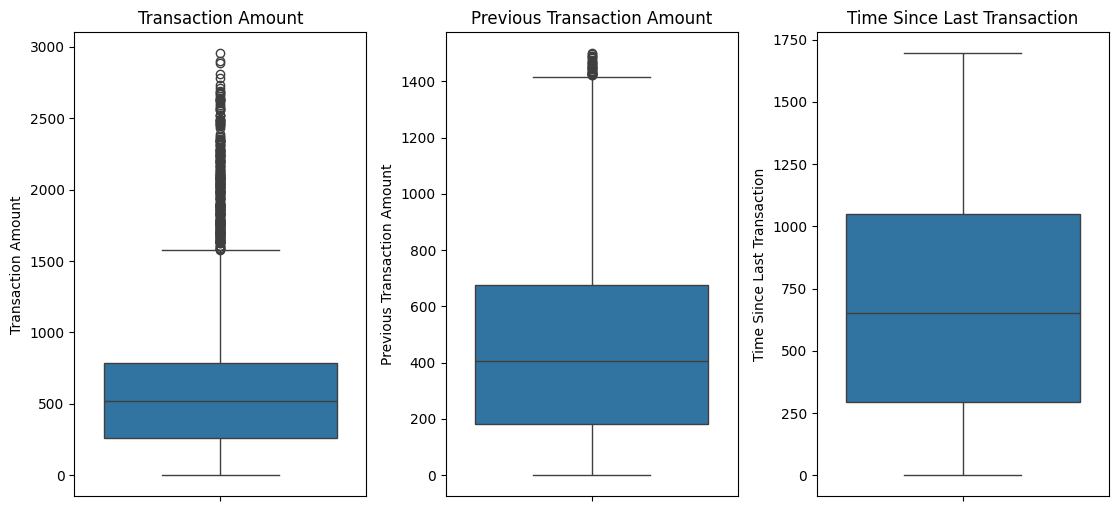

In [14]:

numeric_features = ['Transaction Amount','Previous Transaction Amount', 'Time Since Last Transaction']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# exploratory analysis

### My prediction is that credit card fraud is closely related to 'Transaction Amount', 'Previous Transaction Amount', and 'Time Since Last Transaction', and people in the Houston area are most likely to be deceived.

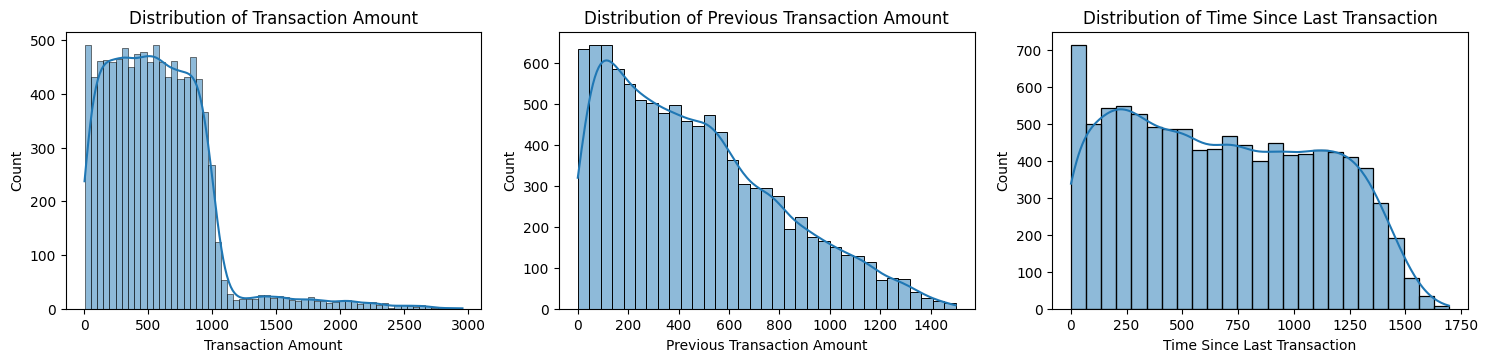

In [17]:
# Distribution of Numerical Features
numeric_features = ['Transaction Amount','Previous Transaction Amount', 'Time Since Last Transaction']

# Plotting the distribution of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_6232/2117474813.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')


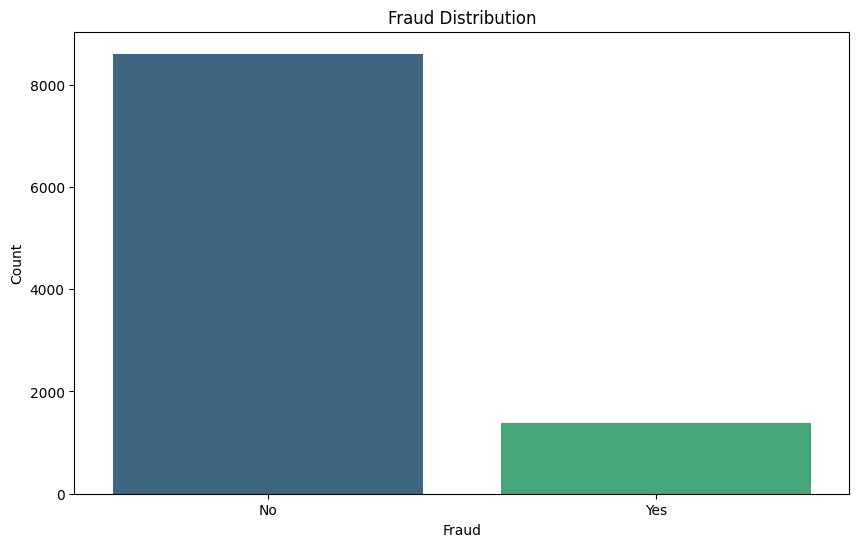

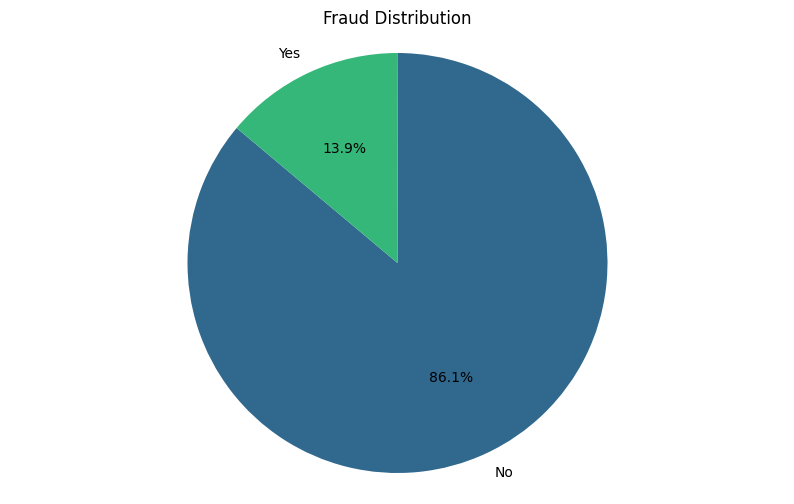

In [21]:
# Count the number of each group
segment_counts = df['Fraud'].value_counts()

# Histogram visualization using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Fraud Distribution')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

# Pie Chart Visualization Using Matplotlib
plt.figure(figsize=(10, 6))
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(segment_counts)))
plt.title('Fraud Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_6232/3786381002.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fraud', y='Transaction Amount', data=df, palette='tab10')


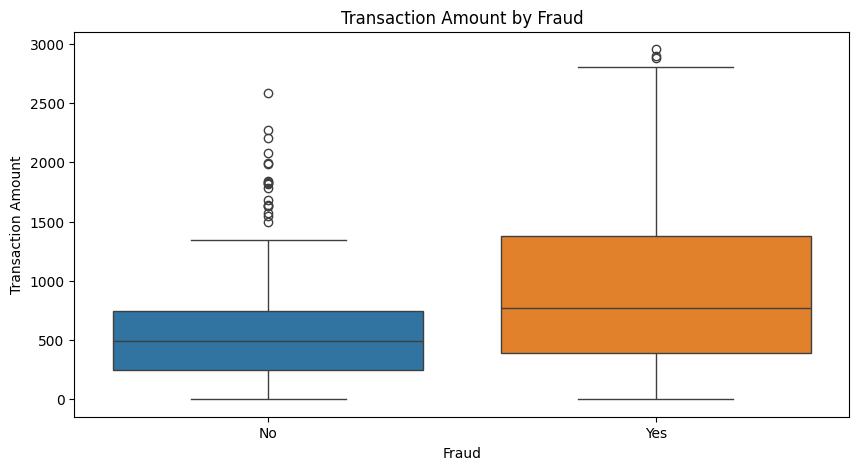

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Fraud', y='Transaction Amount', data=df, palette='tab10')
plt.title('Transaction Amount by Fraud')
plt.show()

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_6232/4079700963.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fraud', y='Time Since Last Transaction', data=df, palette='tab10')


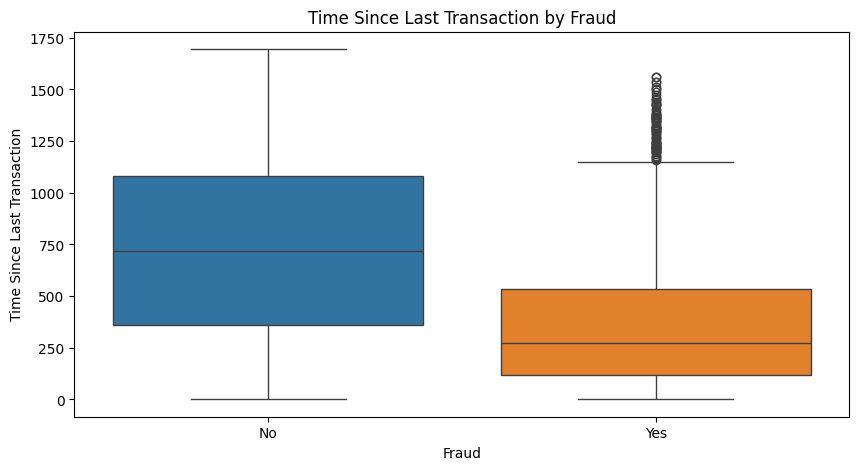

In [24]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Fraud', y='Time Since Last Transaction', data=df, palette='tab10')
plt.title('Time Since Last Transaction by Fraud')
plt.show()

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_6232/1548468729.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fraud', y='Previous Transaction Amount', data=df, palette='tab10')


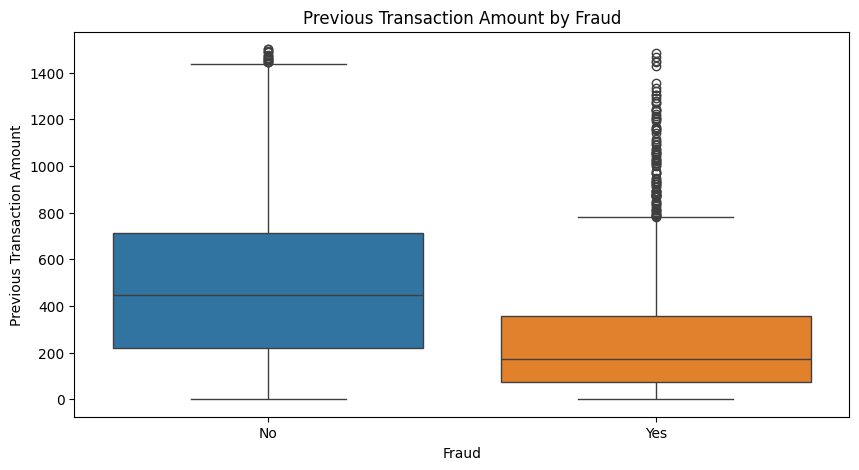

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Fraud', y='Previous Transaction Amount', data=df, palette='tab10')
plt.title('Previous Transaction Amount by Fraud')
plt.show()

In [26]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud,trans_date_time
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No,2023-01-01 00:00:00
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No,2023-01-01 00:01:00
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No,2023-01-01 00:02:00
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No,2023-01-01 00:03:00
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No,2023-01-01 00:04:00


In [33]:
df[df['Fraud'] == 'Yes'].count()

Transaction ID                 1392
Customer ID                    1392
Transaction Amount             1392
Transaction Date and Time      1392
Merchant Category              1392
Location                       1392
Previous Transaction Amount    1392
Time Since Last Transaction    1392
Device Type                    1392
Fraud                          1392
trans_date_time                1392
dtype: int64

        Location  Total_Count  Churn_Count  Fraud_Rate
0        Houston         2373          647   27.265065
1    Los Angeles         1956          182    9.304703
2        Chicago         1915          208   10.861619
3  San Francisco         1890          156    8.253968
4       New York         1866          199   10.664523


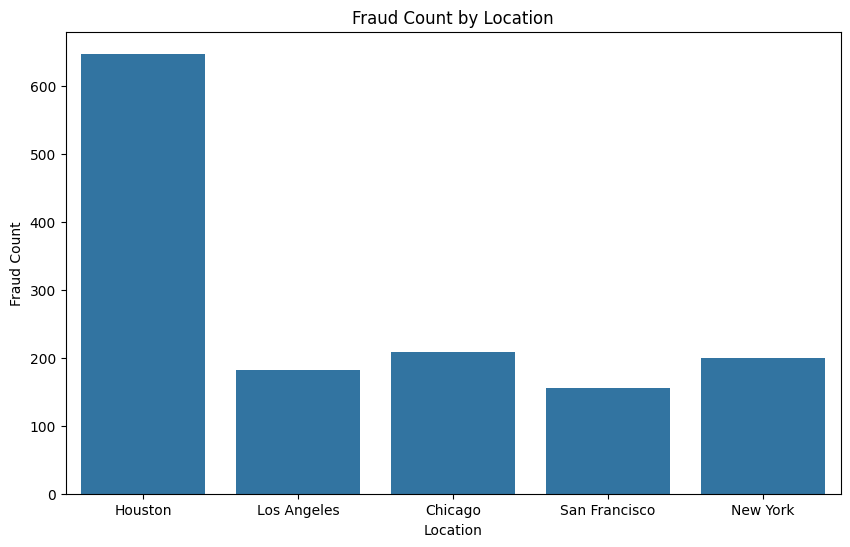

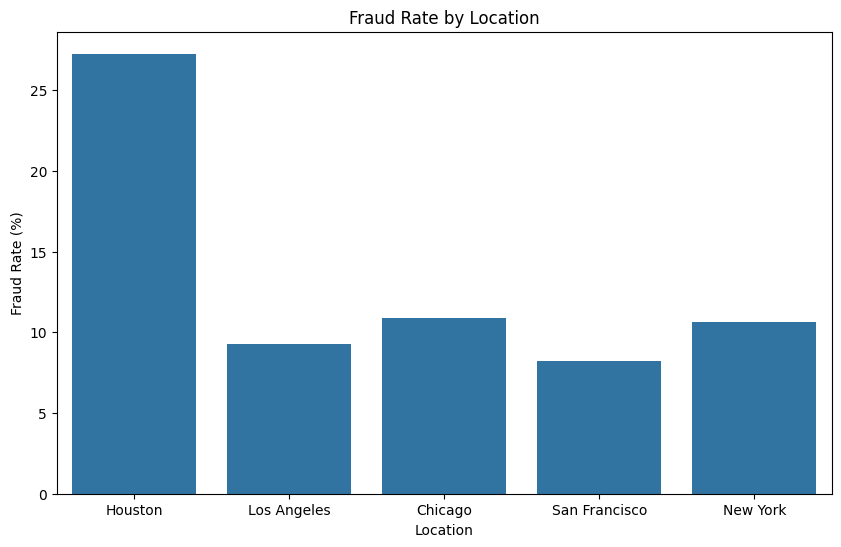

In [34]:

subscription_counts = df['Location'].value_counts()
churn_counts = df[df['Fraud'] == 'Yes']['Location'].value_counts()



churn_counts_df = churn_counts.reset_index()
churn_counts_df.columns = ['Location', 'Churn_Count']

total_counts_df = subscription_counts.reset_index()
total_counts_df.columns = ['Location', 'Total_Count']

combined_df = pd.merge(total_counts_df, churn_counts_df, on='Location')
combined_df['Fraud_Rate'] = (combined_df['Churn_Count'] / combined_df['Total_Count']) * 100

print(combined_df)



plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Churn_Count', data=combined_df)
plt.title('Fraud Count by Location')
plt.xlabel('Location')
plt.ylabel('Fraud Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Fraud_Rate', data=combined_df)
plt.title('Fraud Rate by Location')
plt.xlabel('Location')
plt.ylabel('Fraud Rate (%)')
plt.show()

  Merchant Category  Total_Count  Churn_Count  Fraud_Rate
0            Dining         2077          288   13.866153
1          Clothing         2052          299   14.571150
2         Groceries         1983          274   13.817448
3       Electronics         1955          280   14.322251
4            Travel         1933          251   12.984997


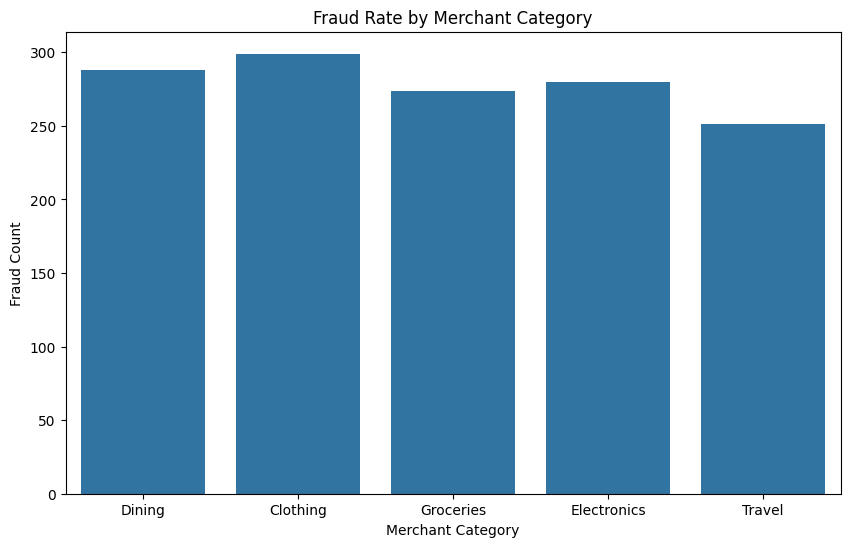

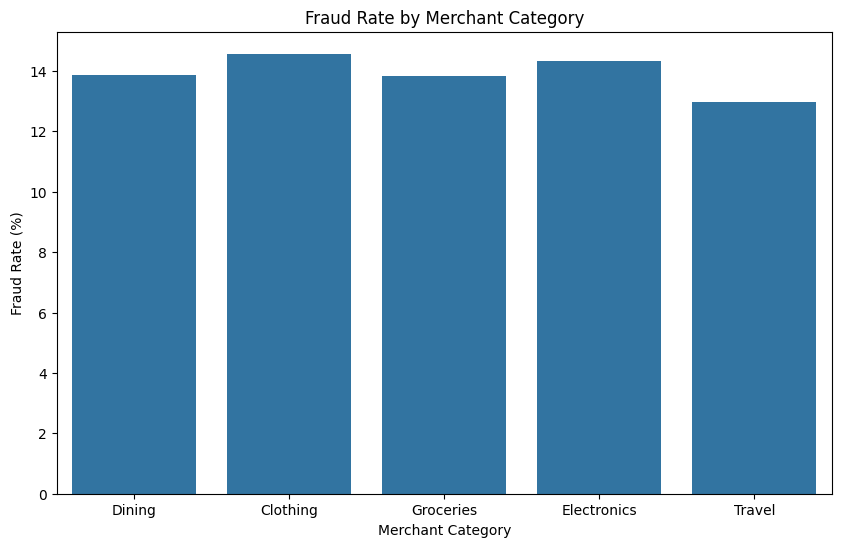

In [35]:

subscription_counts = df['Merchant Category'].value_counts()
churn_counts = df[df['Fraud'] == 'Yes']['Merchant Category'].value_counts()


churn_counts_df = churn_counts.reset_index()
churn_counts_df.columns = ['Merchant Category', 'Churn_Count']

total_counts_df = subscription_counts.reset_index()
total_counts_df.columns = ['Merchant Category', 'Total_Count']

combined_df = pd.merge(total_counts_df, churn_counts_df, on='Merchant Category')
combined_df['Fraud_Rate'] = (combined_df['Churn_Count'] / combined_df['Total_Count']) * 100

print(combined_df)



plt.figure(figsize=(10, 6))
sns.barplot(x='Merchant Category', y='Churn_Count', data=combined_df)
plt.title('Fraud Rate by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Fraud Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='Merchant Category', y='Fraud_Rate', data=combined_df)
plt.title('Fraud Rate by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Fraud Rate (%)')
plt.show()

  Device Type  Total_Count  Churn_Count  Fraud_Rate
0     desktop         5081          710   13.973627
1      mobile         4919          682   13.864607


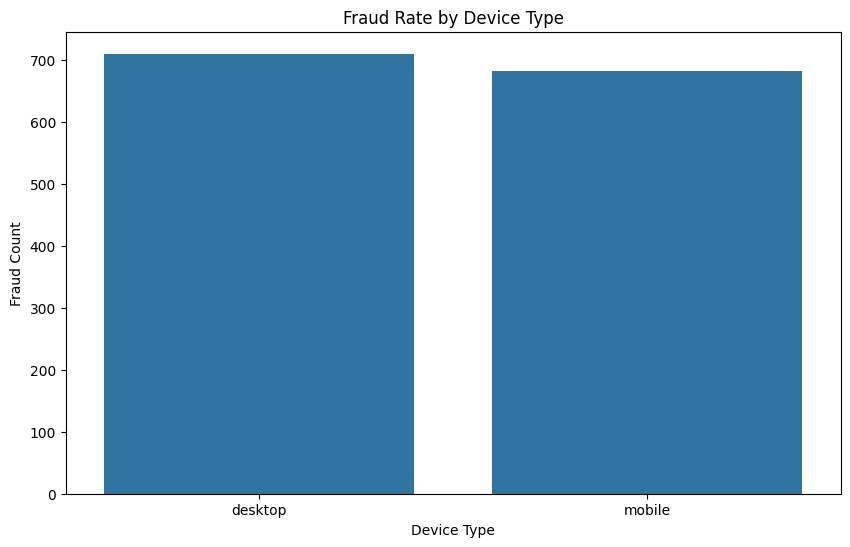

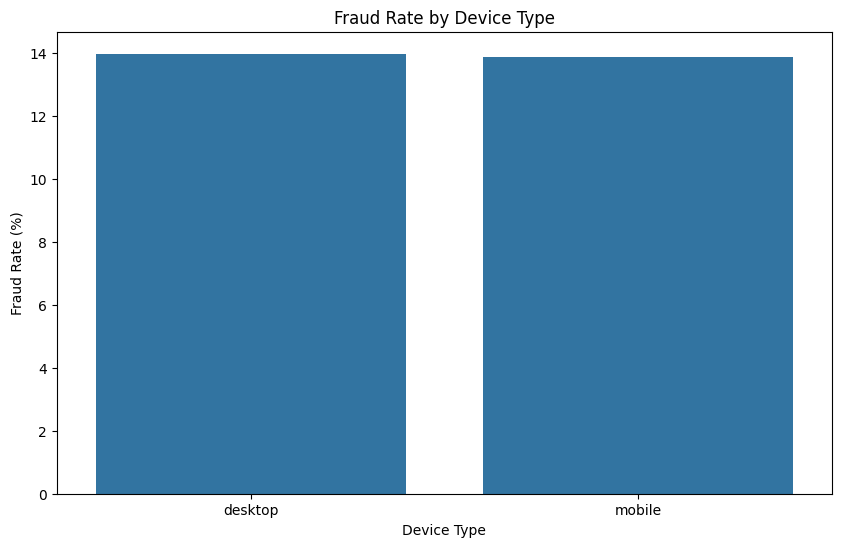

In [36]:

subscription_counts = df['Device Type'].value_counts()
churn_counts = df[df['Fraud'] == 'Yes']['Device Type'].value_counts()



churn_counts_df = churn_counts.reset_index()
churn_counts_df.columns = ['Device Type', 'Churn_Count']

total_counts_df = subscription_counts.reset_index()
total_counts_df.columns = ['Device Type', 'Total_Count']

combined_df = pd.merge(total_counts_df, churn_counts_df, on='Device Type')
combined_df['Fraud_Rate'] = (combined_df['Churn_Count'] / combined_df['Total_Count']) * 100

print(combined_df)



plt.figure(figsize=(10, 6))
sns.barplot(x='Device Type', y='Churn_Count', data=combined_df)
plt.title('Fraud Rate by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Fraud Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='Device Type', y='Fraud_Rate', data=combined_df)
plt.title('Fraud Rate by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Fraud Rate (%)')
plt.show()

<Axes: xlabel='Location'>

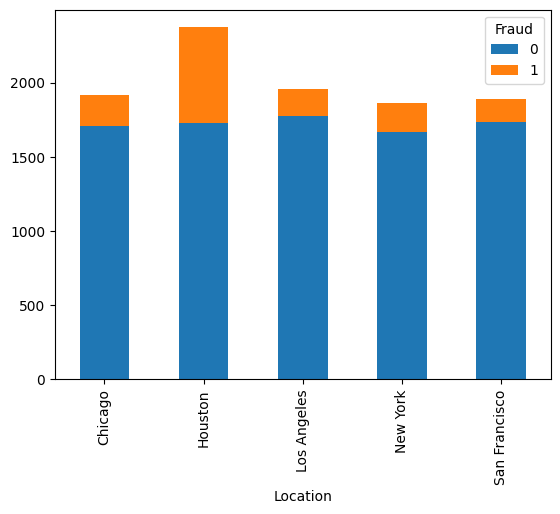

In [94]:
df.groupby(['Location','Fraud'])['Transaction Amount'].count().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='Merchant Category'>

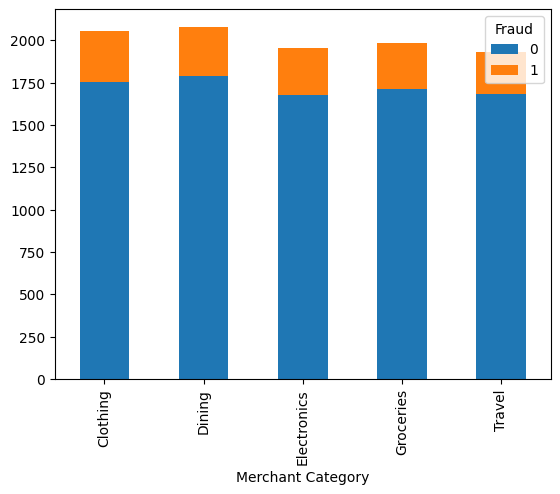

In [95]:
df.groupby(['Merchant Category','Fraud'])['Transaction Amount'].count().unstack().plot(kind='bar', stacked=True)

In [41]:
numeric_df = df[['Transaction Amount','Previous Transaction Amount', 'Time Since Last Transaction']]

# Calculate Pearson correlation coefficient
correlation_matrix = numeric_df.corr(method='pearson')

# Print the correlation matrix
print(correlation_matrix)

                             Transaction Amount  Previous Transaction Amount  \
Transaction Amount                     1.000000                     0.455002   
Previous Transaction Amount            0.455002                     1.000000   
Time Since Last Transaction           -0.163508                     0.107116   

                             Time Since Last Transaction  
Transaction Amount                             -0.163508  
Previous Transaction Amount                     0.107116  
Time Since Last Transaction                     1.000000  


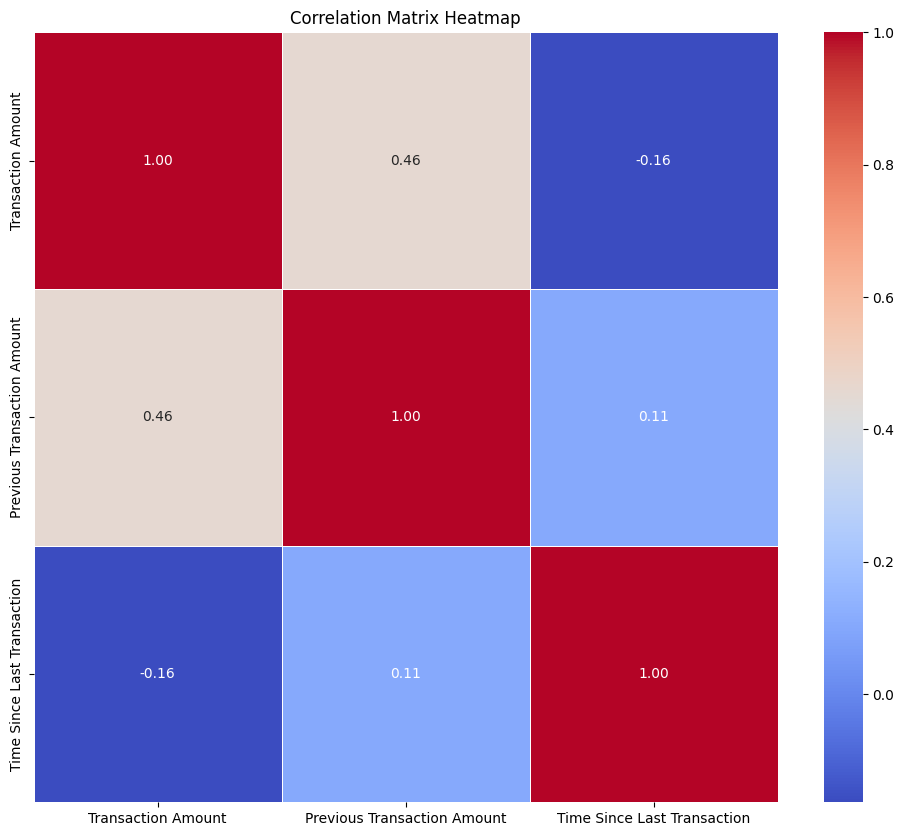

In [43]:
# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Feature Engeering

In [44]:
df['trans_date_time'] = pd.to_datetime(df['Transaction Date and Time'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction ID               10000 non-null  int64         
 1   Customer ID                  10000 non-null  int64         
 2   Transaction Amount           10000 non-null  float64       
 3   Transaction Date and Time    10000 non-null  object        
 4   Merchant Category            10000 non-null  object        
 5   Location                     10000 non-null  object        
 6   Previous Transaction Amount  10000 non-null  float64       
 7   Time Since Last Transaction  10000 non-null  float64       
 8   Device Type                  10000 non-null  object        
 9   Fraud                        10000 non-null  object        
 10  trans_date_time              10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)

In [46]:
df['Merchant Category'].unique()

array(['Clothing', 'Dining', 'Electronics', 'Groceries', 'Travel'],
      dtype=object)

In [47]:
df['Location'].unique()

array(['Los Angeles', 'Houston', 'San Francisco', 'New York', 'Chicago'],
      dtype=object)

In [48]:
df['Device Type'].unique()

array(['desktop', 'mobile'], dtype=object)

In [49]:
# Convert the Device Type and Fraud columns into binary variables
df['device_desktop'] = df['Device Type'].map({'mobile': 0, 'desktop': 1})
df['Fraud'] = df['Fraud'].map({'Yes': 1, 'No': 0})

In [51]:
# Select the categorical variables that need to be converted into dummy variables
cat_col = ['Merchant Category', 'Location']
# Convert categorical variables into dummy variables
df_final = pd.get_dummies(df, columns=cat_col, drop_first=False, dtype=int)

df_final

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud,trans_date_time,device_desktop,Merchant Category_Clothing,Merchant Category_Dining,Merchant Category_Electronics,Merchant Category_Groceries,Merchant Category_Travel,Location_Chicago,Location_Houston,Location_Los Angeles,Location_New York,Location_San Francisco
0,1,4174,659.297095,2023-01-01 00:00:00,579.323704,481.377516,desktop,0,2023-01-01 00:00:00,1,1,0,0,0,0,0,0,1,0,0
1,2,4507,474.046452,2023-01-01 00:01:00,407.220271,1159.211075,desktop,0,2023-01-01 00:01:00,1,0,1,0,0,0,0,1,0,0,0
2,3,1860,498.819570,2023-01-01 00:02:00,265.583605,720.677284,desktop,0,2023-01-01 00:02:00,1,0,1,0,0,0,0,0,0,0,1
3,4,2294,744.199592,2023-01-01 00:03:00,1097.259081,1.000000,mobile,0,2023-01-01 00:03:00,0,0,0,1,0,0,0,0,1,0,0
4,5,2130,279.181247,2023-01-01 00:04:00,238.389682,1378.958721,mobile,0,2023-01-01 00:04:00,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1524,1475.988992,2023-01-07 22:35:00,95.068658,414.231539,desktop,1,2023-01-07 22:35:00,1,1,0,0,0,0,0,0,1,0,0
9996,9997,4879,764.834233,2023-01-07 22:36:00,902.506946,1090.687430,mobile,0,2023-01-07 22:36:00,0,1,0,0,0,0,0,0,1,0,0
9997,9998,2624,882.096776,2023-01-07 22:37:00,531.237353,186.667431,mobile,0,2023-01-07 22:37:00,0,0,0,0,0,1,0,0,0,1,0
9998,9999,4907,1.000000,2023-01-07 22:38:00,0.000000,116.343224,desktop,0,2023-01-07 22:38:00,1,0,1,0,0,0,1,0,0,0,0


In [52]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Transaction ID                 10000 non-null  int64         
 1   Customer ID                    10000 non-null  int64         
 2   Transaction Amount             10000 non-null  float64       
 3   Transaction Date and Time      10000 non-null  object        
 4   Previous Transaction Amount    10000 non-null  float64       
 5   Time Since Last Transaction    10000 non-null  float64       
 6   Device Type                    10000 non-null  object        
 7   Fraud                          10000 non-null  int64         
 8   trans_date_time                10000 non-null  datetime64[ns]
 9   device_desktop                 10000 non-null  int64         
 10  Merchant Category_Clothing     10000 non-null  int64         
 11  Merchant Categor

In [53]:
df_final.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date and Time', 'Previous Transaction Amount',
       'Time Since Last Transaction', 'Device Type', 'Fraud',
       'trans_date_time', 'device_desktop', 'Merchant Category_Clothing',
       'Merchant Category_Dining', 'Merchant Category_Electronics',
       'Merchant Category_Groceries', 'Merchant Category_Travel',
       'Location_Chicago', 'Location_Houston', 'Location_Los Angeles',
       'Location_New York', 'Location_San Francisco'],
      dtype='object')

In [58]:
model_data = df_final[['Transaction Amount',
       'Previous Transaction Amount',
       'Time Since Last Transaction','Fraud','device_desktop', 'Merchant Category_Clothing',
       'Merchant Category_Dining', 'Merchant Category_Electronics',
       'Merchant Category_Groceries', 'Merchant Category_Travel',
       'Location_Chicago', 'Location_Houston', 'Location_Los Angeles',
       'Location_New York', 'Location_San Francisco']]

model_data

,Transaction Amount,Previous Transaction Amount,Time Since Last Transaction,Fraud,device_desktop,Merchant Category_Clothing,Merchant Category_Dining,Merchant Category_Electronics,Merchant Category_Groceries,Merchant Category_Travel,Location_Chicago,Location_Houston,Location_Los Angeles,Location_New York,Location_San Francisco
0,659.297095,579.323704,481.377516,0,1,1,0,0,0,0,0,0,1,0,0
1,474.046452,407.220271,1159.211075,0,1,0,1,0,0,0,0,1,0,0,0
2,498.819570,265.583605,720.677284,0,1,0,1,0,0,0,0,0,0,0,1
3,744.199592,1097.259081,1.000000,0,0,0,0,1,0,0,0,0,1,0,0
4,279.181247,238.389682,1378.958721,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1475.988992,95.068658,414.231539,1,1,1,0,0,0,0,0,0,1,0,0
9996,764.834233,902.506946,1090.687430,0,0,1,0,0,0,0,0,0,1,0,0
9997,882.096776,531.237353,186.667431,0,0,0,0,0,0,1,0,0,0,1,0
9998,1.000000,0.000000,116.343224,0,1,0,1,0,0,0,1,0,0,0,0


# Model Building and Evaluation

In [59]:
X = model_data.drop(columns=['Fraud'])  # Feature variables
y = model_data['Fraud']  # Target variable

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### logistic

In [84]:
# Fitting and Making Predictions for the adaboost model

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

# Evaluating the model performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_logreg))

Confusion Matrix:
[[2585   15]
 [ 200  200]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2600
           1       0.93      0.50      0.65       400

    accuracy                           0.93      3000
   macro avg       0.93      0.75      0.81      3000
weighted avg       0.93      0.93      0.92      3000


Accuracy Score:
0.9283333333333333


In [85]:
# Check for Overfitting with Cross-Validation
cv_scores = cross_val_score(logreg_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.9285 0.929  0.9225 0.927  0.9255]
Mean cross-validation score: 0.9265000000000001


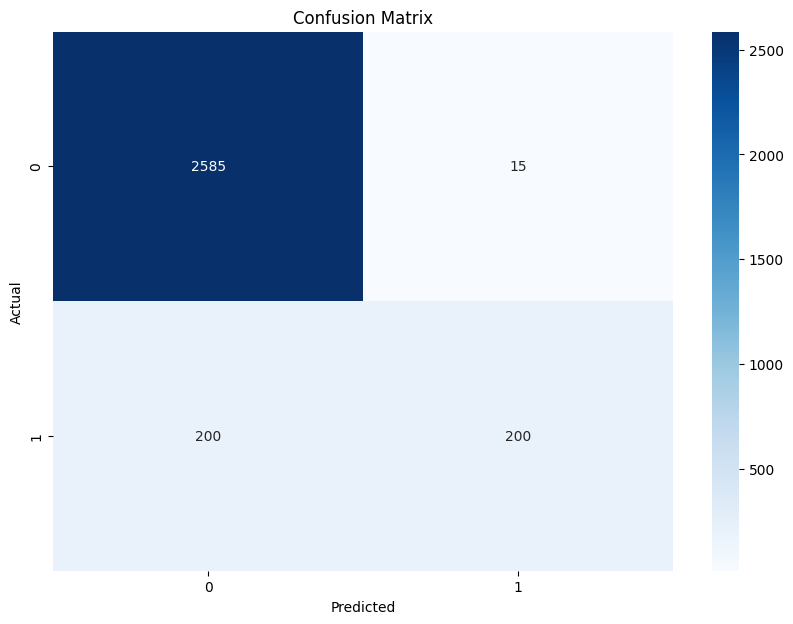

In [86]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

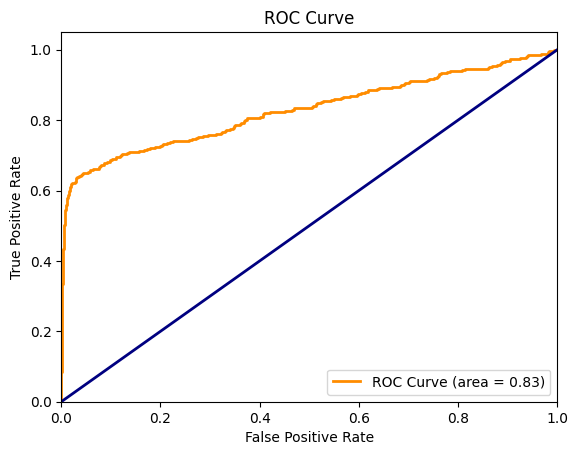

In [87]:
# 预测概率
y_pred_prob =logreg_model.predict_proba(X_test)[:, 1]

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [66]:
# Counting values correctly predicted by the Logistic Regression model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, model_prediction):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

print('For a Logistic Regression Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a Logistic Regression Model:
Number of Total Predictions: 3000
Number of Correct Predictions: 2785
Number of Wrong Predictions: 215


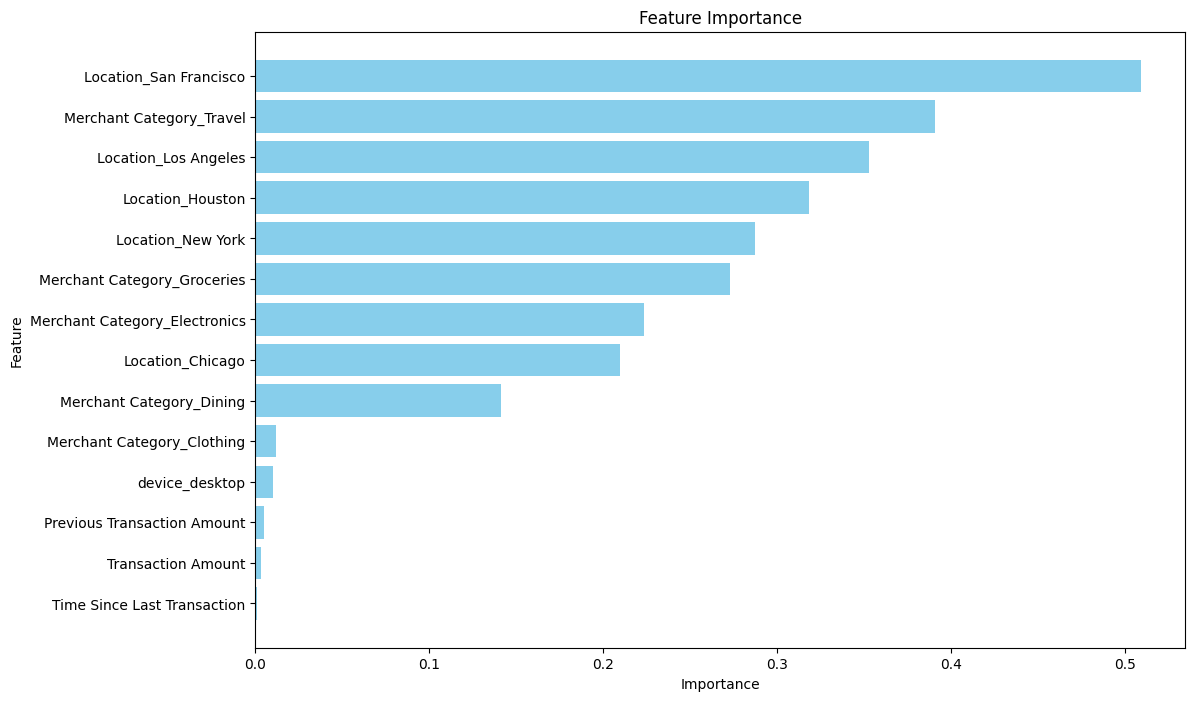

In [90]:
# feature_importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(logreg_model.coef_[0])
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  
plt.show()

### KNN (Not use)

In [104]:
# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Cross-validation evaluation model
cv_scores = cross_val_score(knn_model, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

# Train the model
knn_model.fit(X_train, y_train)

# predict
y_pred_knn = knn_model.predict(X_test)
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_knn))

Cross-Validation Scores: [0.941  0.9415 0.94   0.942  0.944 ]
Mean Cross-Validation Score: 0.9417
Confusion Matrix:
[[2579   21]
 [ 150  250]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2600
           1       0.92      0.62      0.75       400

    accuracy                           0.94      3000
   macro avg       0.93      0.81      0.86      3000
weighted avg       0.94      0.94      0.94      3000


Accuracy Score:
0.943


In [105]:

cv_scores = cross_val_score(knn_model, X, y, cv=10)
print("\nCross-Validation Scores:")
print(cv_scores)
print("\nAverage Cross-Validation Score:")
print(cv_scores.mean())


Cross-Validation Scores:
[0.949 0.935 0.948 0.939 0.935 0.946 0.939 0.943 0.941 0.949]

Average Cross-Validation Score:
0.9423999999999999


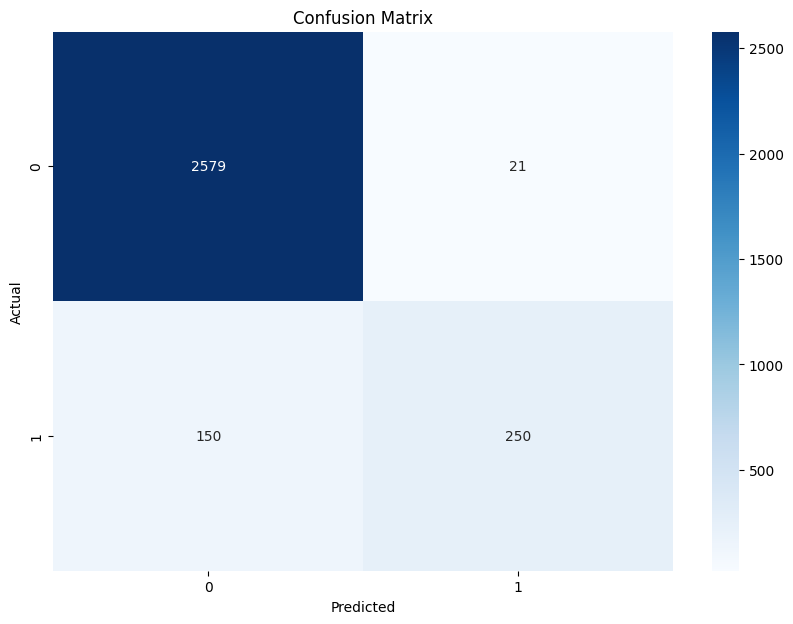

In [106]:
# onfusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

AUC Score: 0.81


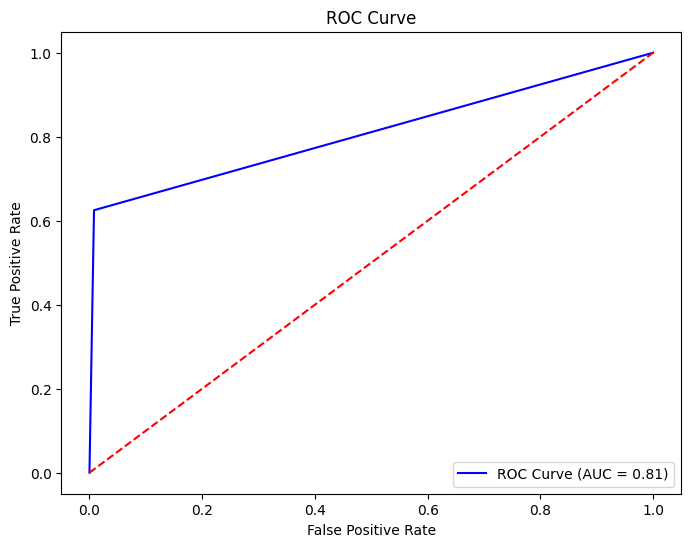

In [109]:
# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
auc_score = roc_auc_score(y_test, y_pred_knn)

# Print AUC value
print(f"AUC Score: {auc_score:.2f}")

# Draw ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Decision Tree(not use)

In [96]:
# tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


y_pred = dt_model.predict(X_test)
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[2396  204]
 [ 151  249]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2600
           1       0.55      0.62      0.58       400

    accuracy                           0.88      3000
   macro avg       0.75      0.77      0.76      3000
weighted avg       0.89      0.88      0.88      3000


Accuracy Score:
0.8816666666666667


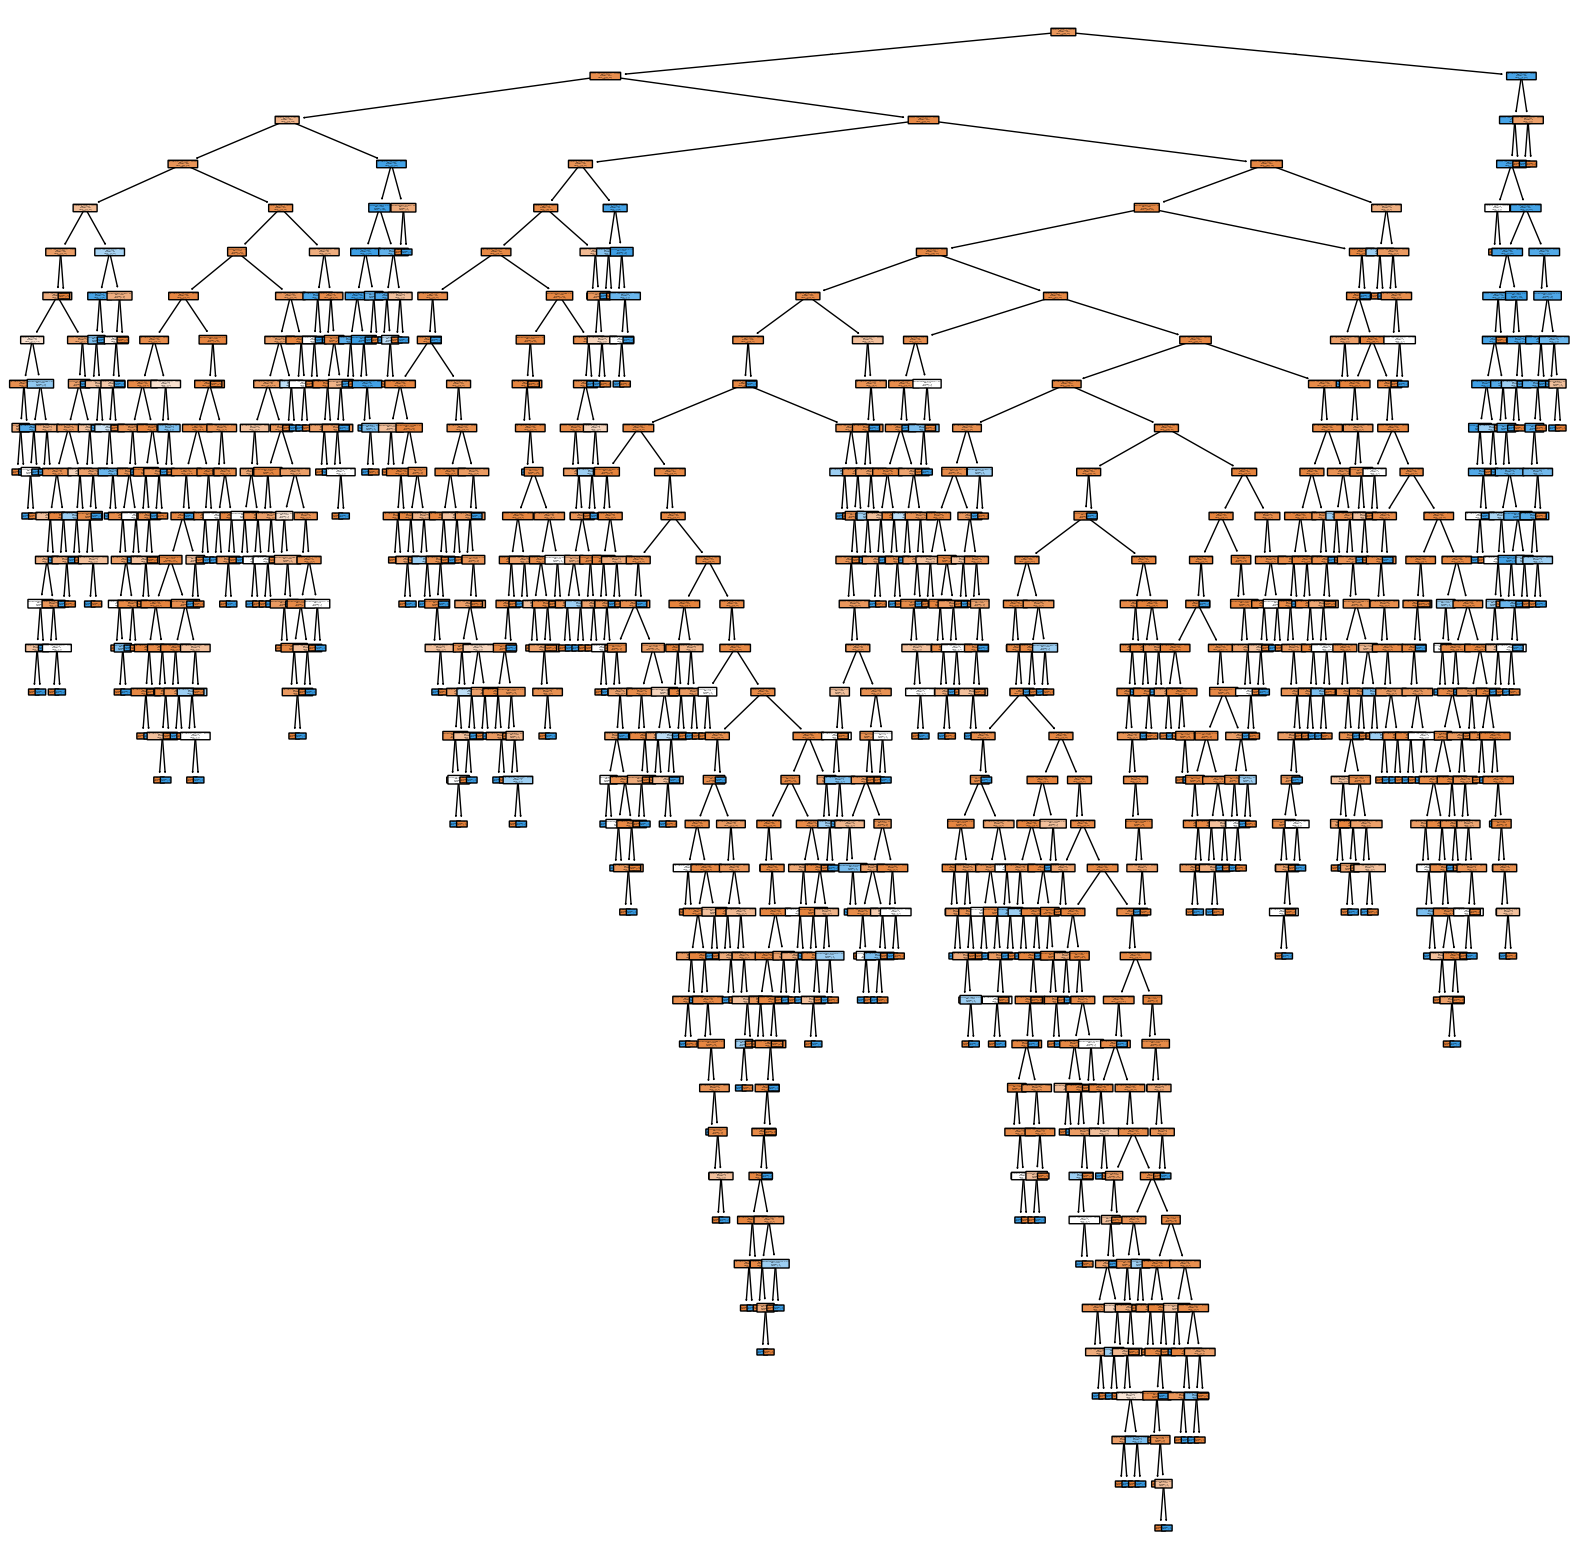

In [118]:
plt.figure(figsize=(20,20))
plot_tree(dt_model, filled=True, rounded=True, class_names=['0','1'], feature_names=X.columns);

In [98]:
# Cross-Validation Scores
cv_scores = cross_val_score(dt_model, X, y, cv=10)
print("\nCross-Validation Scores:")
print(cv_scores)
print("\nAverage Cross-Validation Score:")
print(cv_scores.mean())


Cross-Validation Scores:
[0.886 0.86  0.887 0.894 0.864 0.878 0.876 0.877 0.886 0.889]

Average Cross-Validation Score:
0.8797


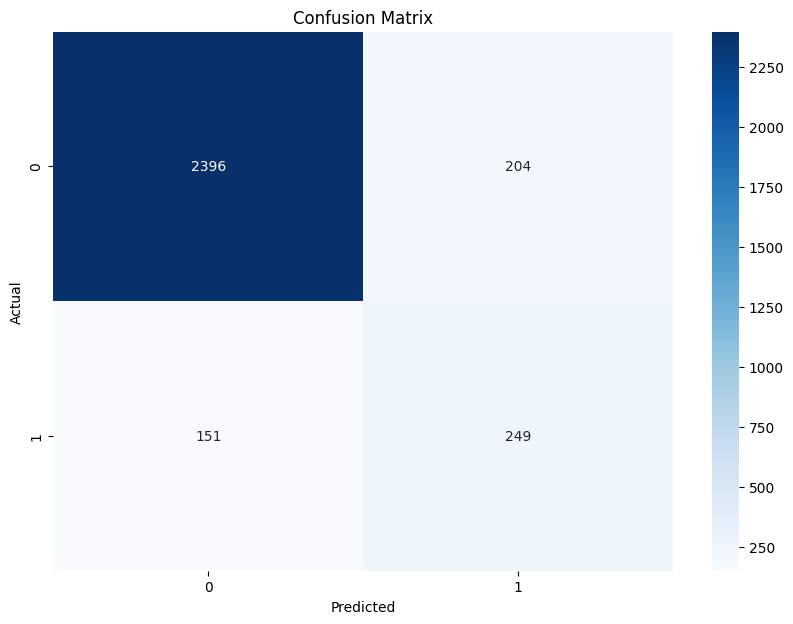

In [99]:
# confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

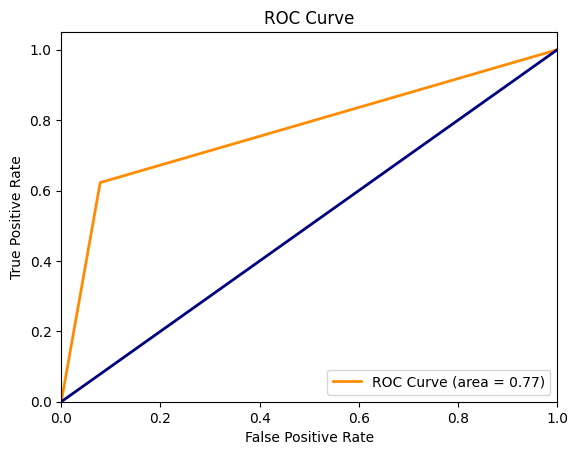

In [101]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

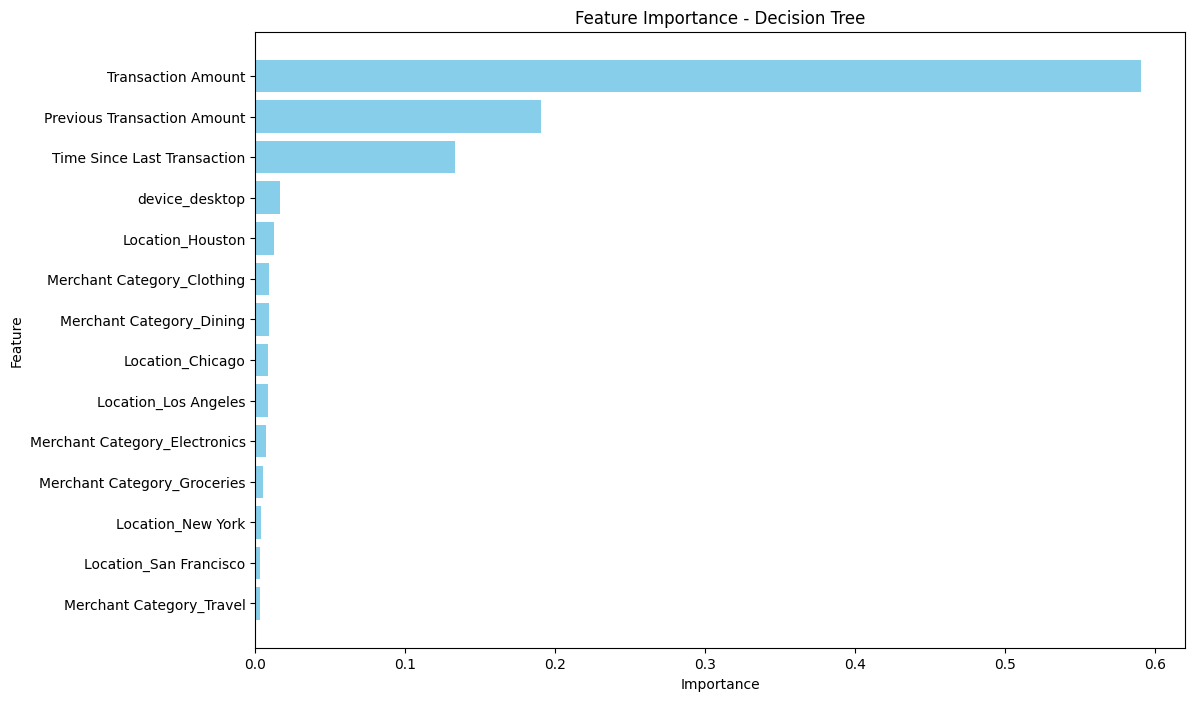

In [103]:
# feature_importance
feature_importance_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
plt.barh(feature_importance_dt['Feature'], feature_importance_dt['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()  
plt.show()

# SVC

In [134]:
# svc
svc = SVC(probability=True, random_state=42)


svc.fit(X_train, y_train)


y_pred_svc = svc.predict(X_test)
y_pred_prob_svc = svc.predict_proba(X_test)[:, 1]


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_svc))

Confusion Matrix:
[[2585   15]
 [ 182  218]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2600
           1       0.94      0.55      0.69       400

    accuracy                           0.93      3000
   macro avg       0.93      0.77      0.83      3000
weighted avg       0.93      0.93      0.93      3000


Accuracy Score:
0.9343333333333333


In [117]:
# Cross-Validation
cv_scores = cross_val_score(svc, X_train, y_train, cv=10)
print("\nCross-Validation Scores:")
print(cv_scores)
print("\nAverage Cross-Validation Score:")
print(cv_scores.mean())


Cross-Validation Scores:
[0.93857143 0.93142857 0.92571429 0.93571429 0.94       0.92714286
 0.93428571 0.92714286 0.94285714 0.93285714]

Average Cross-Validation Score:
0.9335714285714285


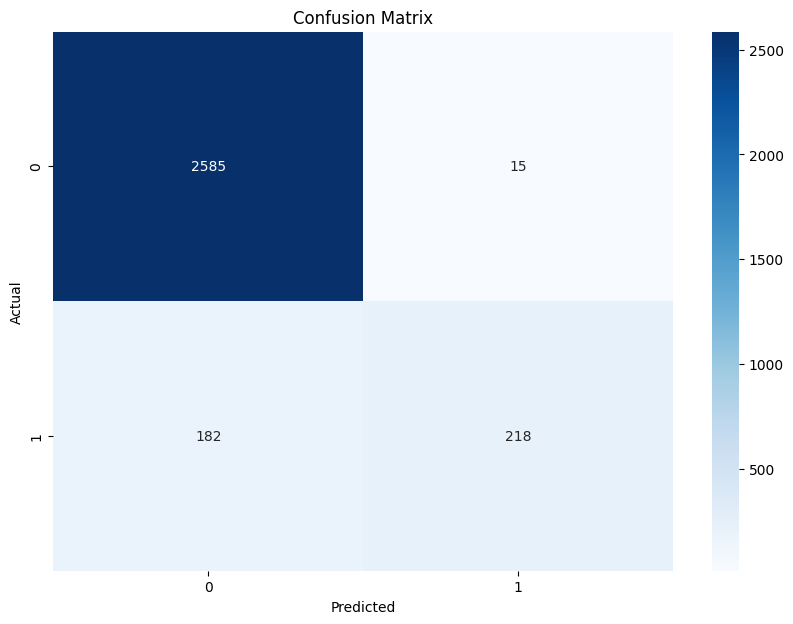

In [115]:
# confusion_matrix
cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

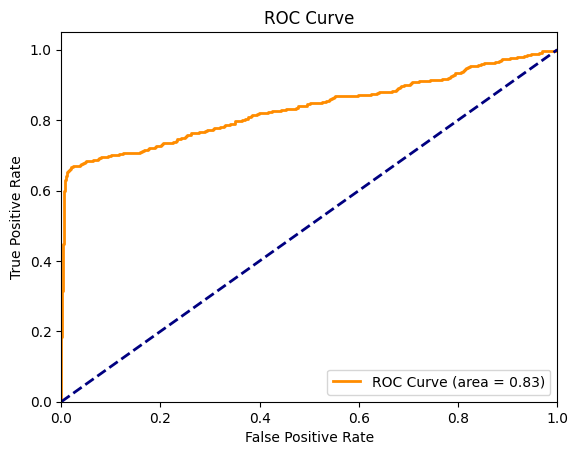

In [116]:
# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_svc)
roc_auc = roc_auc_score(y_test, y_pred_prob_svc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

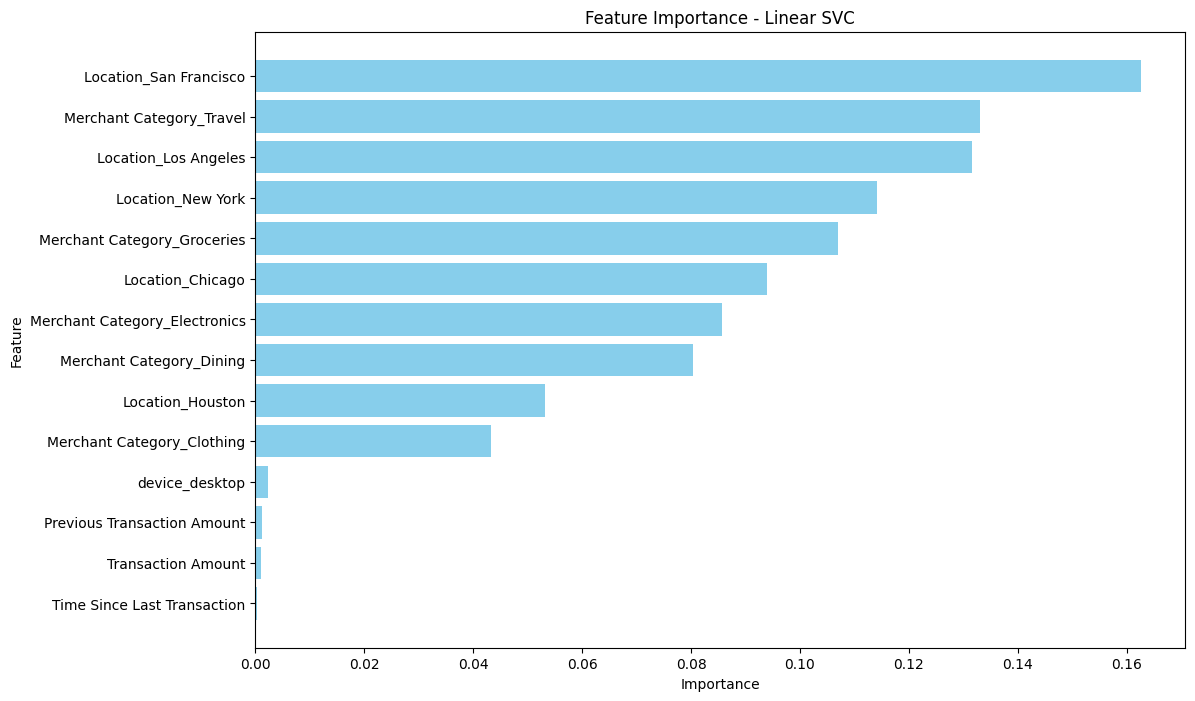

In [124]:
# SVC
linear_svc = LinearSVC(random_state=42, max_iter=10000)

# train
linear_svc.fit(X_train, y_train)


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(linear_svc.coef_[0])
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Linear SVC')
plt.gca().invert_yaxis()  
plt.show()

# Optimizing the model

In [126]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

logreg = LogisticRegression(max_iter=1000)


grid_search = GridSearchCV(logreg, param_grid, cv=10, scoring='roc_auc', verbose=1)
grid_search.fit(X_train, y_train)


best_logreg_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")


y_pred_logreg = best_logreg_model.predict(X_test)
y_pred_prob = best_logreg_model.predict_proba(X_test)[:, 1]



Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was

Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Confusion Matrix:
[[2585   15]
 [ 194  206]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2600
           1       0.93      0.52      0.66       400

    accuracy                           0.93      3000
   macro avg       0.93      0.75      0.81      3000
weighted avg       0.93      0.93      0.92      3000


Accuracy Score:
0.9303333333333333


In [127]:

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_logreg))

Confusion Matrix:
[[2585   15]
 [ 194  206]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2600
           1       0.93      0.52      0.66       400

    accuracy                           0.93      3000
   macro avg       0.93      0.75      0.81      3000
weighted avg       0.93      0.93      0.92      3000


Accuracy Score:
0.9303333333333333


In [128]:
# Cross-Validation
cv_scores = cross_val_score(best_logreg_model, X, y, cv=10)
print("\nCross-Validation Scores:")
print(cv_scores)
print("\nAverage Cross-Validation Score:")
print(cv_scores.mean())


Cross-Validation Scores:
[0.939 0.925 0.932 0.931 0.923 0.924 0.935 0.927 0.924 0.93 ]

Average Cross-Validation Score:
0.9289999999999999


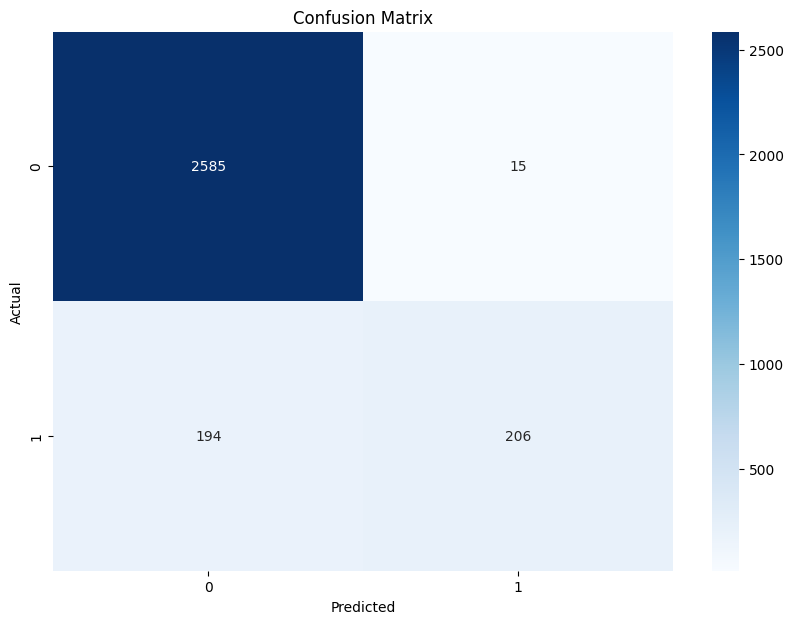

In [129]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

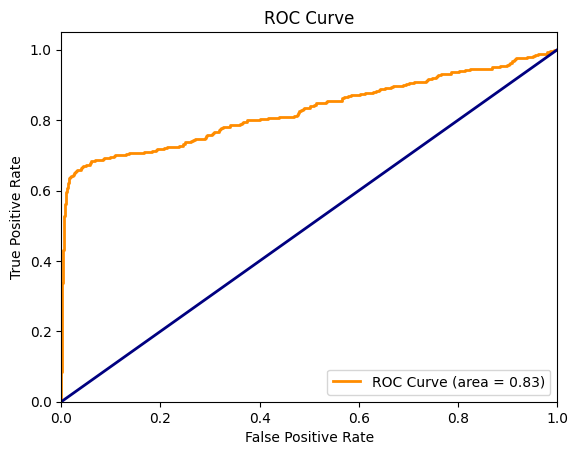

In [130]:
# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

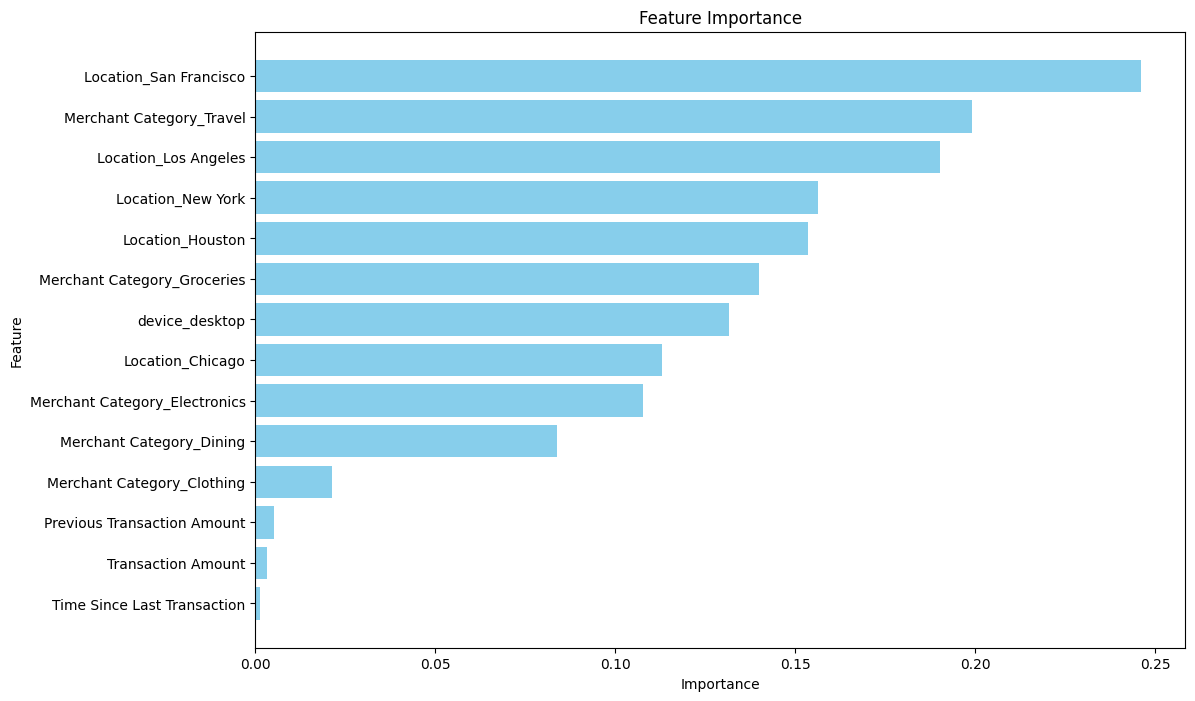

In [133]:
# Obtaining feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(best_logreg_model.coef_[0])
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis() 
plt.show()


/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_6232/3174770310.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features['Importance'], y=top_features['Feature'], palette='viridis')


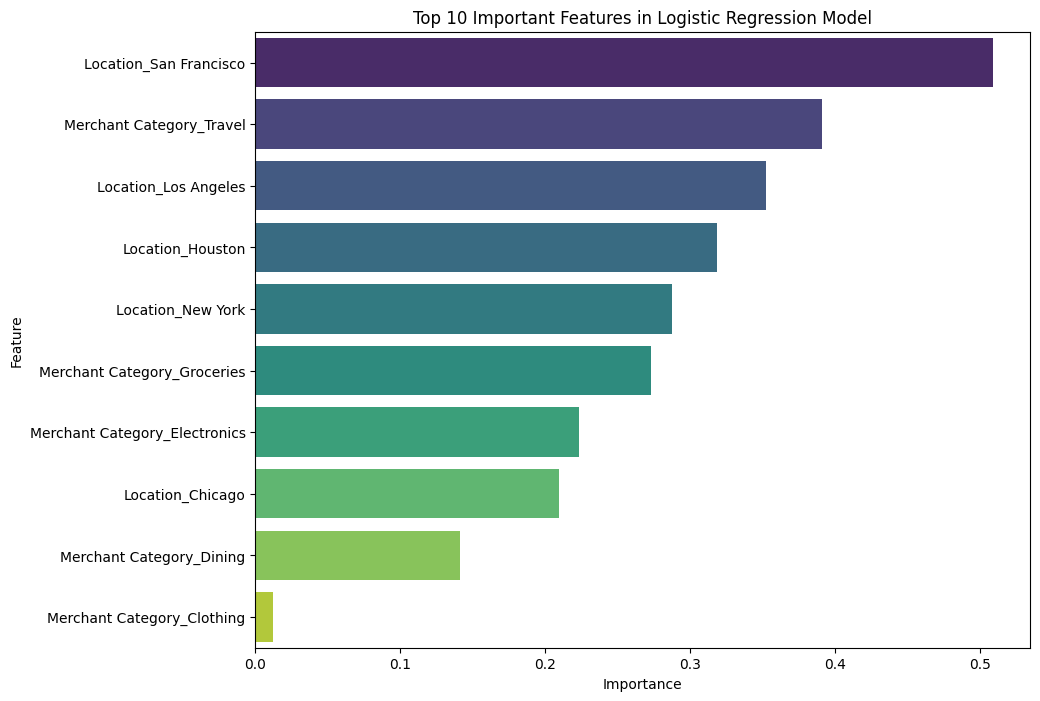

In [119]:

# Feature Importance
feature_importance = np.abs(logreg_model.coef_[0])
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Top 10 important features
top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_features['Importance'], y=top_features['Feature'], palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features in Logistic Regression Model')
plt.show()

In [135]:
df['Location'].unique()

array(['Los Angeles', 'Houston', 'San Francisco', 'New York', 'Chicago'],
      dtype=object)

## Exploration findings, initial hypothesis, and whether the hypothesis proved true.

* Exploration finding : In the initial data exploration, it can be clearly seen that the number of people who were defrauded only accounted for 13.9% of the total population, among which the average transaction amount of the defrauded people was large, and the amount was close to the last transaction and the amount was small. The distribution of fraud rates in locations and merchant categories also varies greatly.

* Initial hypothesis：The initial hypothesis is that different locations, merchant categories, and transaction amounts will affect the fraud rate. The final model also proves that this hypothesis is correct.

# Approach for building and evaluating the model

First, feature engineering was performed on the data, and then the columns needed for the model were selected. Because the output is binary classification data, I used logistic regression, decision tree, KNN and SVC models to predict the output variables. By comparing the Precision, Recall, F1 Score, accuracy, Cross-Validation Score and AUC values ​​of different models, we will select the best model.

KNN: We first eliminated the KNN model. Although it performed the best in all numerical values, it was sensitive to imbalanced data and the output of the data was indeed imbalanced, so we considered that KNN had a tendency to overfit.

Logistic regression: It showed a very high Cross-Validation Score of 92.65%, Precision, Recall, F1 Score and accuracy of 0.93, 0.99, 0.96 and 0.93 respectively. It was a good model with AUC of 83%.

Decision Tree: Cross-Validation Score was 93.35%. Precision, Recall, F1 Score and accuracy were 0.94, 0.92, 0.93 and 0.88 respectively, which performed very well. But the AUC was low at 77%.

SVC: Cross-Validation Score was 87.97%. Precision, Recall, F1 Score and accuracy are 0.93, 0.99, 0.96 and 0.93 respectively, which is also very good. It is a good model with AUC of 83%.

# Final model selected

By comparing logistic regression, Decision Tree and SVC, it can be seen that logistic regression consistently performs well across metrics and shows strong stability with cross-validation among the three models.

The accuracy and average Cross-Validation Score are further improved by optimizing the model.

# Business Use
The company can minimize the number of undetected fraudulent transactions and reduce the number of legitimate transactions marked as fraudulent through the feature importance of the model. Among them, location and merchant category are the most important issues. The company can strengthen supervision in San Francisco, Los Angeles, and Houston to reduce fraud problems, especially in travel transactions.